# The Dot Product

In [1]:
a = c(-1,2)
b = c(3,5)
c = a + b
d = c(-1.5,1.3)
e = 3*d
f = c(-1,1)
g = c(2,-1)
h = 2*f + 3*g

In [2]:
vecplot <- function (v, origin=NULL, col="black", lwd=1) {
    if (is.null(origin)) {
        origin = c(0,0)
    }
    arrows(origin[1],origin[2],v[1]+origin[1],v[2]+origin[2], col=col, lwd=lwd)
}

### The length of a vector

The length of a vector is the number of elements in that vector.

In [3]:
length(a)

[1] 2

`a` and `h` have the same length. 

In [4]:
length(a) == length(h)

[1] TRUE

### The magnitude of a vector

The magnitude of a vector can be calculated with the R `norm` function with an argument of `type="2"`. 

In [5]:
norm(a, type="2")

[1] 2.236068

`a` and `h` do not have the same magnitude. 

In [6]:
norm(a, type="2") == norm(h, type="2") 

[1] FALSE

### Magnitude as Euclidean Distance

The magnitude of a 2-d vector is something you have certainly seen before.

Create component vectors along the $x$ and $y$ axes.

In [7]:
a_x = a[1]
a_y = a[2]
x = c(a_x, 0)
y = c(0, a_y)

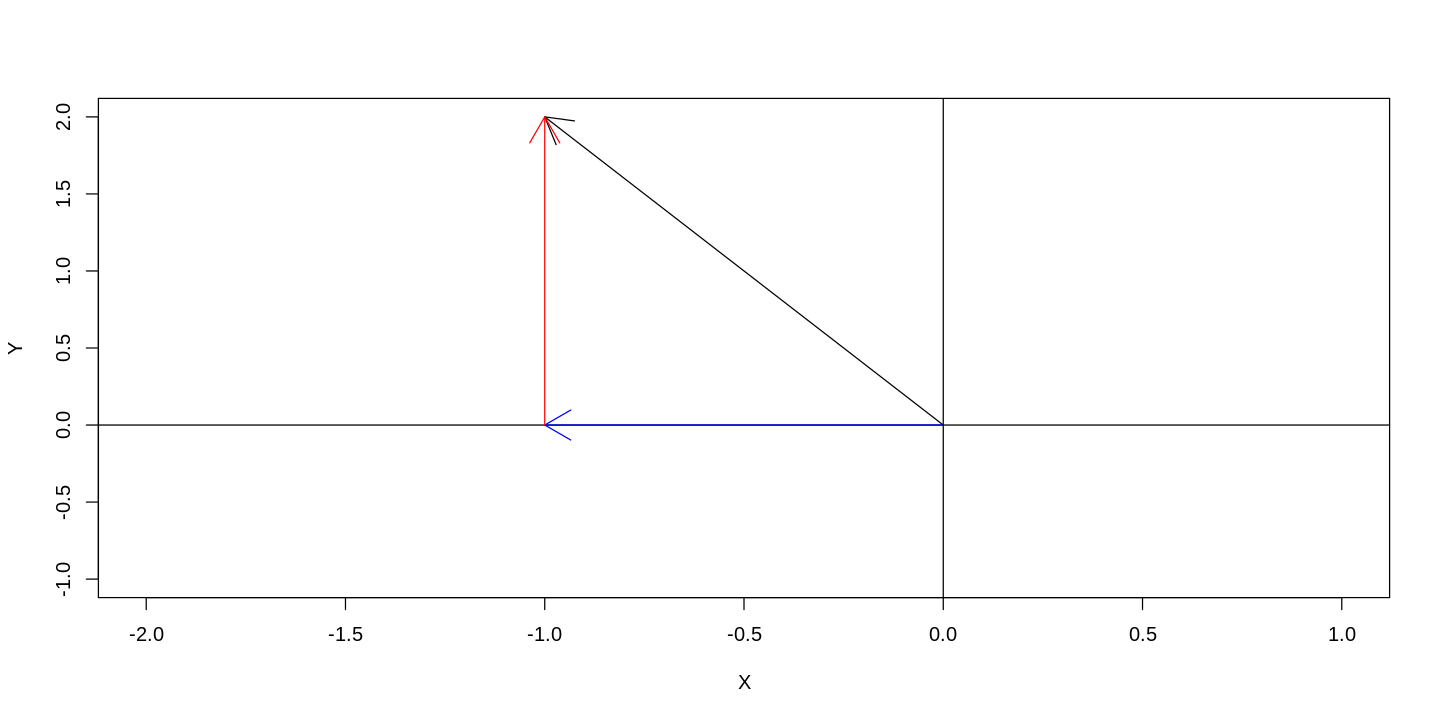

In [8]:
options(repr.plot.width=12, repr.plot.height=6)
plot(NA, xlim=c(-2,1), ylim=c(-1,2), xlab="X", ylab="Y")
abline(h=0); abline(v=0)
vecplot(a)
vecplot(x, col="blue")
vecplot(y, x, col="red")

### Euclidean Distance

The magnitude of $a$ is

$$\rvert\rvert a \rvert\rvert = \sqrt{a_x^2+a_y^2}$$

which should be all to familiar to you as the Pythagorean Theorem.

Incredibly, this generalizes to $p$-dimensional vectors.

$$\rvert\rvert a_p \rvert\rvert = \sqrt{a_1^2+a_2^2\dots+a_p^2}$$

#### The $\ell_2$-Norm

This computation has a fancy name, the $\ell_2$-norm. 

We just saw this above with the function `norm` with the argument `type="2"`.

In [9]:
sqrt(a[1]**2 + a[2]**2)

[1] 2.236068

In [10]:
norm(a, type="2")

[1] 2.236068

We will see our friend, the $\ell_2$-norm again.

For now, let's consider the first computation.

$$\rvert\rvert a \rvert\rvert = \sqrt{a_x^2+a_y^2}$$

We can rewrite this as

$$\rvert\rvert a \rvert\rvert = \sqrt{a_xa_x+a_ya_y}$$

Let's consider just the computation under the radical

$$a_xa_x+a_ya_y$$

This is actually a special compuation, the **dot product**.

# The Dot Product

The dot product, also known as the inner product, is an operation defined over a vector space that yields a scalar. 

We can think of is as a mapping of two vectors to a scalar value

$$f: \mathbf{u}, \mathbf{v} \mapsto \mathbb{R}$$

or the function 

$$f(\mathbf{u}, \mathbf{v}) = \alpha$$

where $\alpha \in \mathbb{R}$. 

#### Example

Given

$$\mathbf{u}=(1,0,-1)$$

$$\mathbf{v}=(-3,3,-2)$$

The dot product of $\mathbf{u}$ and $\mathbf{v}$ is $\langle \mathbf{u}, \mathbf{v}\rangle$ where

$$\langle \mathbf{u}, \mathbf{v}\rangle = 1\cdot(-3)+0\cdot3+(-1)\cdot(-2)=-1$$

$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i$$

In [11]:
u = c(1,0,-1)
v = c(-3,3,-2)
u%*%v

-1


#### The Dot Product is Commutative

NOTE: $$\langle \mathbf{u}, \mathbf{v}\rangle = \langle \mathbf{v}, \mathbf{u}\rangle$$ for all $\mathbf{u}$, $\mathbf{v}$.

### The Magnitude of a Vector is the Square Root of the Dot Product of a Vector with Itself

Knowing this, it is easy to see that

$$a_xa_x+a_ya_y$$

is the dot product of $\mathbf{a}$ with itself.

Then

$$\rvert\rvert a \rvert\rvert = \sqrt{\langle \mathbf{a}, \mathbf{a}\rangle}$$

In [12]:
norm(a, type="2")

[1] 2.236068

In [13]:
a%*%a == a[1]**2 + a[2]**2

TRUE


In [14]:
sqrt(a%*%a)

2.236068


#### Geometric Interpretation of the Dot Product

Geometrically, the dot product is the magnitude of the project of one vector onto another vector. Below $proj_BA$ is the projection of $A$ onto $B$ - it is the part of $A$ that is in the same direction as $B$.

In [15]:
b_norm = norm(b, type="2")
b_hat = b/b_norm
a_dot_b = as.integer(a%*%b)

proj_ab = b_hat*(a_dot_b/b_norm)

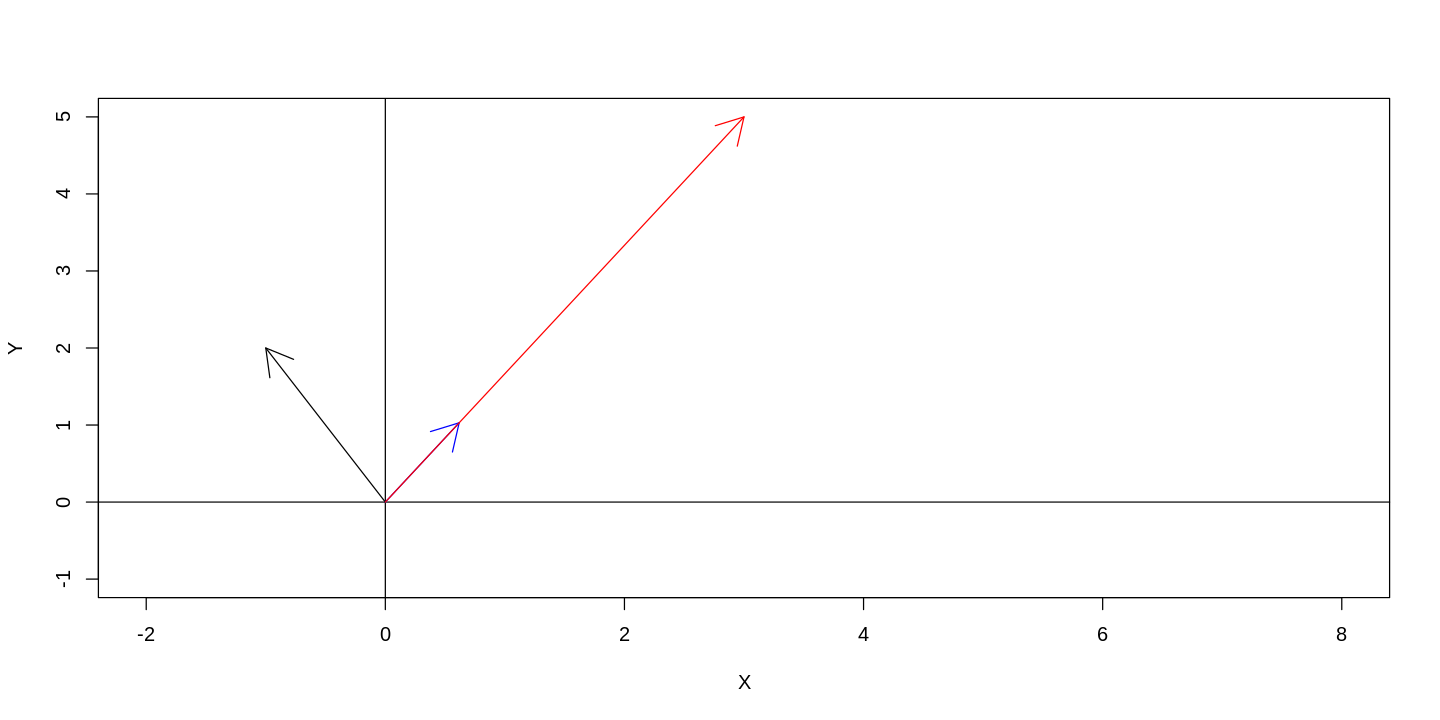

In [16]:
options(repr.plot.width=12, repr.plot.height=6)
plot(NA, xlim=c(-2,8), ylim=c(-1,5), xlab="X", ylab="Y")
abline(h=0); abline(v=0)
vecplot(a)
vecplot(proj_ab, col="blue")
vecplot(b, col="red")

![](http://images.tutorvista.com/cms/images/98/projectiomn.PNG)

##### The projection of a vector onto itself is the vector itself!!!

Thus, the dot product is the magnitude of the vector!

## A Note on Writing Vectors

These two forms of vector representation are equivalent 

$$(a,b,c,d)=\left(\begin{matrix}a\\b\\c\\d\end{matrix}\right)$$

This form is known as the **column vector** form. 

A vector written as boldface later e.g. $\mathbf{u}$ is typically considered to be in column vector form.

## A Note on Writing Vectors

A vector written as 

$$\left(\begin{matrix}e& f& g& h\end{matrix}\right)$$ 

is considered to be written in the **row vector** form.

## Changing Vectors Forms

Vectors can be transformed from one form to the other via the transpose operation.

$$\mathbf{m}=(1,2,3,4)$$

then

$$\mathbf{m}^T=\left(\begin{matrix}1&2&3&4\end{matrix}\right)$$

#### `t()` as the transpose

We can achieve the transpose in R with the `t()` function.

In [ ]:
t(a) == a

#### The importance of row and column vectors

This is important because we think of the dot product as a row vector times a column vector

$$\langle \mathbf{u}, \mathbf{v}\rangle = \sum u_i\cdot v_i = \mathbf{u}^T\mathbf{v}=\left(\begin{matrix}1&0&-1\end{matrix}\right)\left(\begin{matrix}-3 \\ 3 \\-2\end{matrix}\right)= 1\cdot(-3)+0\cdot+(-1)\cdot(-2)=1$$